# Deep Learning

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Artificial-neural-networks" data-toc-modified-id="Artificial-neural-networks-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Artificial neural networks</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression-(0-hidden-layers-neural-network)" data-toc-modified-id="Logistic-Regression-(0-hidden-layers-neural-network)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Logistic Regression (0 hidden layers neural network)</a></span></li><li><span><a href="#Multilayer-Perceptron-(1+-hidden-layers-neural-network)" data-toc-modified-id="Multilayer-Perceptron-(1+-hidden-layers-neural-network)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Multilayer Perceptron (1+ hidden layers neural network)</a></span><ul class="toc-item"><li><span><a href="#Creation" data-toc-modified-id="Creation-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Creation</a></span></li><li><span><a href="#Layer-addition" data-toc-modified-id="Layer-addition-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Layer addition</a></span></li><li><span><a href="#Compilation" data-toc-modified-id="Compilation-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Compilation</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Predicting" data-toc-modified-id="Predicting-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Predicting</a></span></li><li><span><a href="#Exploration-of-layers" data-toc-modified-id="Exploration-of-layers-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Exploration of layers</a></span></li></ul></li></ul></li><li><span><a href="#Deep-Learning-for-Computer-Vision" data-toc-modified-id="Deep-Learning-for-Computer-Vision-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Deep Learning for Computer Vision</a></span><ul class="toc-item"><li><span><a href="#Not-DL-model" data-toc-modified-id="Not-DL-model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Not DL model</a></span><ul class="toc-item"><li><span><a href="#Training" data-toc-modified-id="Training-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Predicting" data-toc-modified-id="Predicting-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Predicting</a></span></li><li><span><a href="#Accuracy-score" data-toc-modified-id="Accuracy-score-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Accuracy score</a></span></li></ul></li><li><span><a href="#Artificial-neural-network" data-toc-modified-id="Artificial-neural-network-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Artificial neural network</a></span></li><li><span><a href="#Convolutional-neural-network-(CNN)" data-toc-modified-id="Convolutional-neural-network-(CNN)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Convolutional neural network (CNN)</a></span></li><li><span><a href="#Pretrained-nets" data-toc-modified-id="Pretrained-nets-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Pretrained nets</a></span></li></ul></li><li><span><a href="#Deep-Learning-for-NLP-(natural-language-processing)" data-toc-modified-id="Deep-Learning-for-NLP-(natural-language-processing)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Deep Learning for NLP (natural language processing)</a></span></li><li><span><a href="#Further-materials" data-toc-modified-id="Further-materials-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Further materials</a></span></li></ul></div>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# tensorflow low level library
# keras high level library

In [3]:
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers

In [4]:
import matplotlib.pyplot as plt

## Artificial neural networks

Lets build our first neural network to predict breast cancer. Will it perform better than Logistic Regression?

In [5]:
df = pd.read_csv("../datasets/breast_cancer.csv")

In [6]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,is_cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [7]:
X = df.drop("is_cancer", axis=1)
y = df.is_cancer

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [9]:
print(f"Training set has {X_train.shape[0]} entries")
print(f"Test set has {X_test.shape[0]} entries")

Training set has 455 entries
Test set has 114 entries


### Logistic Regression (0 hidden layers neural network)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
log = LogisticRegression(max_iter=10000)

In [12]:
log.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [13]:
log.score(X_train, y_train)

0.9626373626373627

In [14]:
log.score(X_test, y_test)

0.9473684210526315

In [28]:
pd.Series(log.coef_[0], index=X.columns).sort_values().tail()

worst_texture           0.500559
worst_concave_points    0.513071
worst_compactness       0.622471
worst_symmetry          0.653937
worst_concavity         1.108933
dtype: float64

Logistic Regression finds the best weights $w_i$, one per feature, and an extra parameter $b$, to predict $y$ given feature values $x_i$

To predict a new test instance, it does two steps:

$$z = \sum_{i}x_i * w_i + b$$

$$y=\frac{1}{1 + e^{-z}}$$

<img width=300 src="https://miro.medium.com/max/1086/1*dkpb3XSLslX9IjIAGrSYsA.png">

### Multilayer Perceptron (1+ hidden layers neural network)

<img width=500 src="./multilayer.png">

#### Creation

In [22]:
# neural network creation
network = models.Sequential()

The core building block of neural networks is the **layer**, composed of different **nodes**
 
Our neural network will have:
 * input layer: dimension 30 (number of predictors)
 * hidden layer 1: dimension 10
 * output layer: dimension 1 (is_cancer)

In [24]:
X_train.shape

(455, 30)

#### Layer addition

In [26]:
network.add(layers.Dense(10, activation='relu', input_shape=(30,)))
network.add(layers.Dense(1, activation='sigmoid'))

A network:
 * while training, finds the optimal weights (arrows between layers)
 * while predicting, fast forwards the features $x_i$ through the network. At every layer:
  * multiplies by weights
  * runs through activation function

How many weights do we need?

In [29]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                310       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


Activation functions give non-linearity nature to neural networks

<img width=600 src="https://miro.medium.com/max/1200/1*ZafDv3VUm60Eh10OeJu1vw.png">

#### Compilation

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

 * A **loss function** (differentiable metric): this is how the network will be able to measure how good a job it is doing on its training data
 * An **optimizer**: this is the mechanism through which the network will update itself based on the data it sees.
 * **Metrics** to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly classified

In [32]:
network.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

[Keras optimizers](https://keras.io/api/optimizers/)  
[Keras losses](https://keras.io/api/losses/)

#### Training

A network is trained by epochs (steps). At every epoch:
 1. predicts with given weights (forward propagation)
 2. compares with real labels
 3. updates weights (back propagation)

In [33]:
network.fit(X_train, y_train.astype(float), epochs=30, validation_split=0.1)
# validation split: percentaage of samples not used for training, used for validating at every epoch

Epoch 1/30
13/13 [==============================] - 1s 49ms/step - loss: 43.3458 - accuracy: 0.3642 - val_loss: 17.0958 - val_accuracy: 0.4783
Epoch 2/30
13/13 [==============================] - 0s 7ms/step - loss: 18.6739 - accuracy: 0.2894 - val_loss: 22.2995 - val_accuracy: 0.1304
Epoch 3/30
13/13 [==============================] - 0s 7ms/step - loss: 13.3997 - accuracy: 0.2999 - val_loss: 15.2625 - val_accuracy: 0.0870
Epoch 4/30
13/13 [==============================] - 0s 8ms/step - loss: 10.5273 - accuracy: 0.1368 - val_loss: 11.2489 - val_accuracy: 0.2174
Epoch 5/30
13/13 [==============================] - 0s 7ms/step - loss: 9.8028 - accuracy: 0.1596 - val_loss: 10.5034 - val_accuracy: 0.1522
Epoch 6/30
13/13 [==============================] - 0s 8ms/step - loss: 8.0509 - accuracy: 0.1296 - val_loss: 9.2501 - val_accuracy: 0.0435
Epoch 7/30
13/13 [==============================] - 0s 7ms/step - loss: 7.1672 - accuracy: 0.1572 - val_loss: 5.9812 - val_accuracy: 0.1957
Epoch 8/30

#### Predicting

What does the network predict for the first 10 test entries??

In [34]:
# predictions
network.predict(X_test)[:10].round(3)

array([[1.   ],
       [0.284],
       [0.068],
       [0.835],
       [1.   ],
       [0.998],
       [1.   ],
       [0.492],
       [1.   ],
       [0.269]], dtype=float32)

In [35]:
# real
y_test[:10]

121    1
322    0
55     0
89     0
317    1
253    1
64     1
185    0
35     1
380    0
Name: is_cancer, dtype: int64

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(network.predict(X_test) > 0.5, y_test)

0.8421052631578947

Not better than logistic regression in this case. We may need to tweak the number of layers / number of nodes per layer / number of epochs of training

#### Exploration of layers

In [39]:
network.layers

In [41]:
network.layers[0].get_weights()[0].shape

(30, 10)

In [43]:
network.layers[0].get_weights()[0][:, 0]

array([-0.4644966 ,  0.00544675,  0.03985872, -0.36157113, -0.11737107,
       -0.22697969,  0.14314587,  0.10668746, -0.2649396 , -0.47089168,
       -0.04490367, -0.41261637, -0.07817256,  0.2279445 , -0.21633326,
        0.14705351,  0.27616328, -0.12333041, -0.13004687, -0.46232507,
       -0.06210327,  0.06442921,  0.07591327,  0.28914964, -0.15450154,
       -0.05393789, -0.29049274,  0.3442989 , -0.09766134, -0.10008123],
      dtype=float32)

In [47]:
network.layers[1].get_weights()[0]

array([[ 0.24612482],
       [ 0.4902556 ],
       [-0.60435003],
       [-0.6362233 ],
       [ 0.39632088],
       [ 0.4129767 ],
       [-0.0860914 ],
       [-0.67562133],
       [-0.6815029 ],
       [ 0.35862136]], dtype=float32)

## Deep Learning for Computer Vision

Lets classify hand-written digits

The problem: classification in the MNIST dataset
 * **classify** grayscale images 
 * of handwritten digits
 * 28 pixels by 28 pixels
 * into their 10 categories (0 to 9)

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [48]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [49]:
type(train_images)

numpy.ndarray

In [50]:
train_images.shape

(60000, 28, 28)

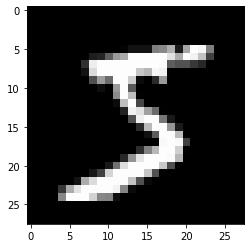

In [55]:
plt.imshow(train_images[0], cmap="gray")

In [56]:
train_labels[0]

5

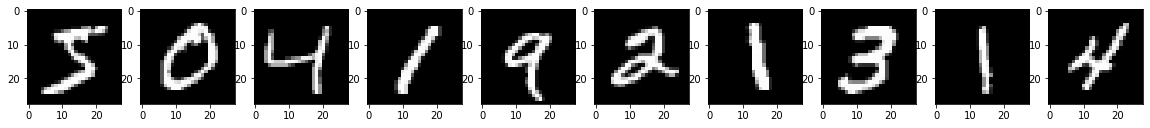

In [57]:
n_images = 10
fig, axs = plt.subplots(1, n_images, figsize=(20, 20))
for i in range(n_images):
    axs[i].imshow(train_images[i], cmap="gray")

In [58]:
train_labels[:n_images]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### Not DL model

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

In [62]:
from sklearn.model_selection import GridSearchCV

In [64]:
train_images[0].shape

(28, 28)

In [67]:
X_train = train_images.reshape(train_images.shape[0], -1)
X_test = test_images.reshape(test_images.shape[0], -1)

In [69]:
train_images.shape

(60000, 28, 28)

In [70]:
train_images[0].shape

(28, 28)

In [71]:
X_train.shape

(60000, 784)

In [72]:
X_train[0].shape

(784,)

#### Training

In [73]:
model = GradientBoostingClassifier(n_estimators=10, max_depth=5, max_features=0.1)

In [74]:
model.fit(X_train, train_labels)

GradientBoostingClassifier(max_depth=5, max_features=0.1, n_estimators=10)

#### Predicting

Lets see how this works on the first 10 test images

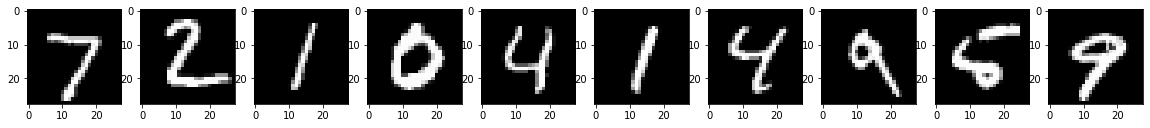

In [75]:
n_images = 10
fig, axs = plt.subplots(1, n_images, figsize=(20, 20))
for i in range(n_images):
    axs[i].imshow(test_images[i], cmap="gray")

In [76]:
model.predict(X_test[:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

Lets now see some examples not correctly predicted

In [78]:
error_indices = np.argwhere(test_labels[:1000] != model.predict(X_test[:1000]))

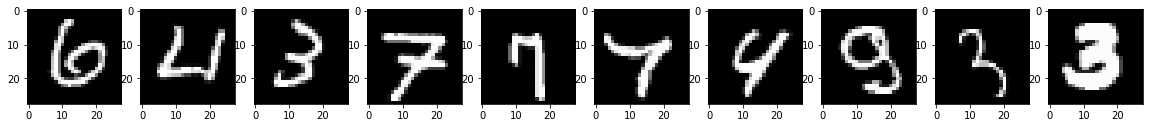

In [79]:
n_images = 10
fig, axs = plt.subplots(1, n_images, figsize=(20, 20))
for i, index in zip(range(n_images), error_indices):
    axs[i].imshow(test_images[index][0], cmap="gray")

In [80]:
for i in error_indices[:10]:
    print(model.predict(X_test[i].reshape(1, -1)))

[0]
[0]
[2]
[9]
[9]
[4]
[9]
[2]
[9]
[8]


#### Accuracy score

In [81]:
model.score(X_train, train_labels)

0.9160666666666667

In [82]:
model.score(X_test, test_labels)

0.9094

### Artificial neural network

Our workflow will be as follow: 
 * first we will present our neural network with the training data, `train_images` and `train_labels`...
 * this way, the network will then learn to associate images and labels
 * finally, we will ask the network to produce predictions for `test_images`...
 * and we will verify if these predictions match the labels from `test_labels`

In [83]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [107]:
network = models.Sequential()

 * Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers
 * The second (and last) layer is a 10-way "softmax" layer, which means...
 * it will return an array of 10 probability scores (summing to 1)
 * each score being the probability that the current digit image belongs to one of our 10 digit classes.

In [108]:
network.add(layers.Dense(256, activation='relu', input_shape=(784,)))
network.add(layers.Dense(10, activation='softmax'))

In [109]:
network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Before training:
 * reshape every 28x28 image into a 784 vector
 * scaling it so that all values are in the `[0, 1]` interval

In [87]:
train_vectors = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_vectors = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

In [90]:
train_vectors.shape

(60000, 784)

We also need to categorically encode the labels, a step which we explain in chapter 3:

In [92]:
from tensorflow.keras.utils import to_categorical

In [93]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [94]:
train_labels_hot = to_categorical(train_labels)
test_labels_hot = to_categorical(test_labels)

In [95]:
train_labels_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [98]:
train_labels[10]

3

In [99]:
train_labels_hot[10]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

In each forward pass, we ain't need to pass 60k images, we can pass batches and have more than one training step per epoch

In [103]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [110]:
%%time
network.fit(train_vectors, train_labels_hot, epochs=20, batch_size=128, validation_split=0.1)
# no gpu

Epoch 1/20
422/422 [==============================] - 4s 7ms/step - loss: 0.4995 - accuracy: 0.8620 - val_loss: 0.1467 - val_accuracy: 0.9552
Epoch 2/20
422/422 [==============================] - 3s 7ms/step - loss: 0.1510 - accuracy: 0.9553 - val_loss: 0.0987 - val_accuracy: 0.9715
Epoch 3/20
422/422 [==============================] - 3s 7ms/step - loss: 0.0946 - accuracy: 0.9723 - val_loss: 0.0860 - val_accuracy: 0.9745
Epoch 4/20
422/422 [==============================] - 3s 7ms/step - loss: 0.0683 - accuracy: 0.9801 - val_loss: 0.0755 - val_accuracy: 0.9790
Epoch 5/20
422/422 [==============================] - 3s 7ms/step - loss: 0.0549 - accuracy: 0.9839 - val_loss: 0.0715 - val_accuracy: 0.9788
Epoch 6/20
422/422 [==============================] - 3s 7ms/step - loss: 0.0408 - accuracy: 0.9884 - val_loss: 0.0706 - val_accuracy: 0.9815
Epoch 7/20
422/422 [==============================] - 3s 7ms/step - loss: 0.0329 - accuracy: 0.9905 - val_loss: 0.0699 - val_accuracy: 0.9803
Epoch 

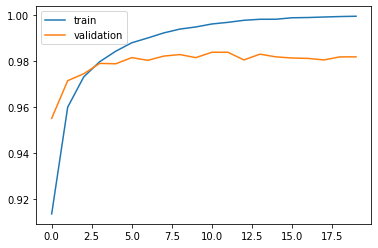

In [113]:
plt.plot(network.history.history["accuracy"], label="train")
plt.plot(network.history.history["val_accuracy"], label="validation")
plt.legend()

In [114]:
_, test_acc = network.evaluate(test_vectors, test_labels_hot)

313/313 [==============================] - 1s 2ms/step - loss: 0.0865 - accuracy: 0.9812


In [116]:
test_acc

0.9811999797821045

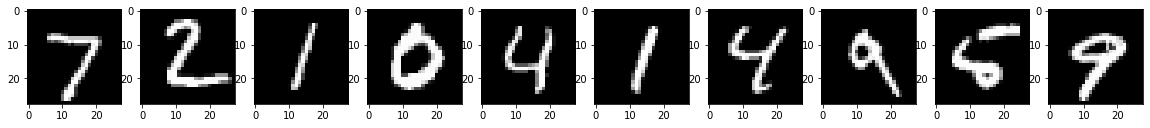

In [117]:
n_images = 10
fig, axs = plt.subplots(1, n_images, figsize=(20, 20))
for i in range(n_images):
    axs[i].imshow(test_images[i], cmap="gray")

Some examples

In [118]:
test_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [119]:
np.argmax(network.predict(test_vectors), axis=-1)[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

Some examples not correctly predicted

In [120]:
error_indices = np.argwhere(test_labels[:1000] != np.argmax(network.predict(test_vectors), axis=-1)[:1000]).flatten()

In [121]:
error_indices

array([149, 247, 274, 321, 340, 445, 495, 619, 659, 684, 720, 726, 810,
       900, 947, 951])

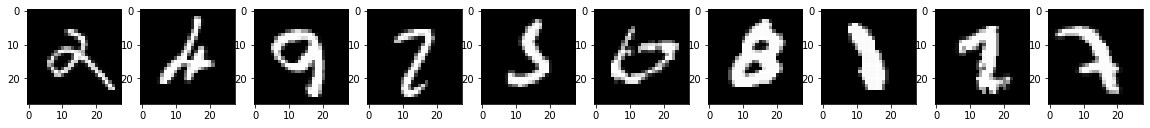

In [122]:
n_images = 10
fig, axs = plt.subplots(1, n_images, figsize=(20, 20))
for i, index in zip(range(n_images), error_indices):
    axs[i].imshow(test_images[index], cmap="gray")

In [123]:
test_labels[error_indices][:10]

array([2, 4, 9, 2, 5, 6, 8, 1, 2, 7], dtype=uint8)

In [124]:
np.argmax(network.predict(test_vectors[error_indices]), axis=-1)[:10]

array([9, 2, 3, 7, 3, 0, 2, 8, 1, 3])

Explore the network

In [125]:
network.layers[0].get_weights()[0].shape

(784, 256)

In [126]:
network.layers[1].get_weights()[0].shape

(256, 10)

In not as homogeneous datasets, this type of networks perform **badly** on image datasets

### Convolutional neural network (CNN)

Are specially prepared for image analysis

(See presentation ppt)

In [137]:
model = models.Sequential()

In [138]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [139]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [140]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)               

In [141]:
train_images.shape

(60000, 28, 28)

In [142]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [143]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [144]:
model.fit(train_images, train_labels_hot, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 27s 62ms/step - loss: 0.5686 - accuracy: 0.8171 - val_loss: 0.0541 - val_accuracy: 0.9840
Epoch 2/10
422/422 [==============================] - 25s 60ms/step - loss: 0.0615 - accuracy: 0.9811 - val_loss: 0.0411 - val_accuracy: 0.9875
Epoch 3/10
422/422 [==============================] - 25s 59ms/step - loss: 0.0409 - accuracy: 0.9867 - val_loss: 0.0355 - val_accuracy: 0.9892
Epoch 4/10
422/422 [==============================] - 25s 60ms/step - loss: 0.0277 - accuracy: 0.9908 - val_loss: 0.0321 - val_accuracy: 0.9908
Epoch 5/10
422/422 [==============================] - 24s 58ms/step - loss: 0.0201 - accuracy: 0.9939 - val_loss: 0.0343 - val_accuracy: 0.9898
Epoch 6/10
422/422 [==============================] - 25s 59ms/step - loss: 0.0162 - accuracy: 0.9945 - val_loss: 0.0306 - val_accuracy: 0.9927
Epoch 7/10
422/422 [==============================] - 25s 60ms/step - loss: 0.0145 - accuracy: 0.9957 - val_loss: 0.0381 - val_accuracy:

Why does validation accuracy appear to be better than training accuracy? As said by Keras documentation:  
"Besides, the training loss that Keras displays is the average of the losses for each batch of training data, over the current epoch."  
[LINK](https://keras.io/getting_started/faq/#why-is-my-training-loss-much-higher-than-my-testing-loss)

In [145]:
_, test_acc = model.evaluate(test_images, test_labels_hot)

313/313 [==============================] - 2s 6ms/step - loss: 0.0299 - accuracy: 0.9925


In [146]:
test_acc

0.9925000071525574

 * Before we had 98% accuracy
 * Now we have 99.25% accuracy
 * Meaning 62.5% of previous errors are now correct

Some examples of previous bad predictions

In [150]:
error_indices

array([149, 247, 274, 321, 340, 445, 495, 619, 659, 684, 720, 726, 810,
       900, 947, 951])

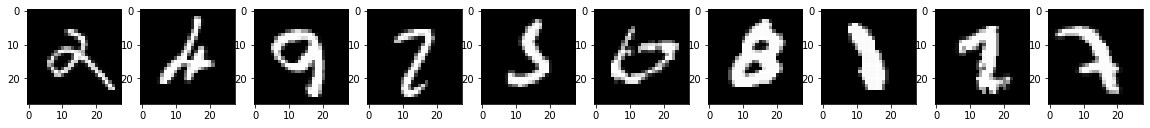

In [149]:
n_images = 10
fig, axs = plt.subplots(1, n_images, figsize=(20, 20))
for i, index in zip(range(n_images), error_indices):
    axs[i].imshow(test_images[index], cmap="gray")

In [152]:
# reality
test_labels[error_indices][:10]

array([2, 4, 9, 2, 5, 6, 8, 1, 2, 7], dtype=uint8)

Old model

In [153]:
np.argmax(network.predict(test_vectors[error_indices]), axis=-1)[:10]

array([9, 2, 3, 7, 3, 0, 2, 8, 1, 3])

New model

In [154]:
np.argmax(model.predict(test_images[error_indices]), axis=-1)[:10]

array([2, 4, 9, 7, 5, 6, 8, 1, 7, 7])

### Pretrained nets

In [155]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

## Deep Learning for NLP (natural language processing)

The building block of Deep Learning for NLP are word embeddings (as explained in the slides)

In [157]:
import gensim

In [158]:
%%time
model = gensim.models.KeyedVectors.load_word2vec_format('../../../../Documents/coding/ss-wrapper/embedding.vectors', binary=False)

CPU times: user 2min 7s, sys: 1.11 s, total: 2min 8s
Wall time: 2min 8s


In [159]:
word = "queen"

In [160]:
word_vector = model[word]

In [164]:
word_vector.shape

(300,)

In [165]:
other_words = ["dog", "king", "god", "cream", "princess"]

In [166]:
other_words_vectors = [model[w] for w in other_words]

In [167]:
similarities = model.cosine_similarities(
    word_vector, 
    other_words_vectors
)

In [168]:
similarities

array([0.11103875, 0.6313495 , 0.17146927, 0.06811734, 0.64820254],
      dtype=float32)

In [169]:
most_similar = other_words[similarities.argmax()]

In [170]:
most_similar

'princess'

## Further materials

[Transfer learning]()